# **Exercise 1: Data Cleaning & Exploratory Data Analysis**

**Dataset Exploration:**

 ● Import the dataset using pandas.

  ● Display top rows (df.head()), column info (df.info()), and summary statistics (df.describe()).
  
   ● Explain data types and categorical variables.

In [1]:
#Import required libraries
import pandas as pd

In [2]:
#Load the dataset Insurance
df = pd.read_csv('/content/Insurance .csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Data Types:**

The df.info() output would show us the data type of each column. We will likely see:

**int64 or float64:** These are numerical data types.
int64 represents integers (whole numbers) and is likely used for columns like **age** and **children**.
float64 represents floating-point numbers (numbers with decimal places) and is likely used for columns like **bmi** and **charges**.
**object:** This data type is typically used for strings or mixed data types. In this dataset, columns like **sex,** **smoker**, and **region** will likely be of type object as they contain text.
Categorical Variables:

Categorical variables are those that represent categories or groups. In our dataset, the categorical variables are likely:

**sex:** This variable represents the gender of the individual and will likely have categories like *'female*' and *'male'*.
**smoker:** This variable indicates whether the individual is a smoker or not and will likely have categories like **'yes'** and **'no'**.
**region:** This variable represents the geographical region of the individual and will likely have categories corresponding to different regions (*e.g., 'southwest', 'southeast', 'northwest', 'northeast'*).
These categorical variables will need to be encoded into numerical formats before being used in most machine learning models

**Data Cleaning:**

● Handle any missing data (if any).

● Encode categorical features (e.g., sex, smoker, region) using label encoding or one-hot encoding.

● Normalize or scale numerical features if required (e.g., age, bmi).

In [6]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
print(df.columns.tolist())

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [9]:
# Separate numerical and categorical columns
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

# Imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_features] = num_imputer.fit_transform(df[num_features])
df[cat_features] = cat_imputer.fit_transform(df[cat_features])



In [10]:
# Imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_features] = num_imputer.fit_transform(df[num_features])
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

In [11]:
label_enc = LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])       # e.g., male=1, female=0
df['smoker'] = label_enc.fit_transform(df['smoker']) # e.g., yes=1, no=0

In [12]:
print(df.head())

    age  sex     bmi  children  smoker     region      charges
0  19.0    0  27.900       0.0       1  southwest  16884.92400
1  18.0    1  33.770       1.0       0  southeast   1725.55230
2  28.0    1  33.000       3.0       0  southeast   4449.46200
3  33.0    1  22.705       0.0       0  northwest  21984.47061
4  32.0    1  28.880       0.0       0  northwest   3866.85520


In [13]:
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [14]:
print(df.head())

        age  sex       bmi  children  smoker     region      charges
0 -1.438764    0 -0.453320 -0.908614       1  southwest  16884.92400
1 -1.509965    1  0.509621 -0.078767       0  southeast   1725.55230
2 -0.797954    1  0.383307  1.580926       0  southeast   4449.46200
3 -0.441948    1 -1.305531 -0.908614       0  northwest  21984.47061
4 -0.513149    1 -0.292556 -0.908614       0  northwest   3866.85520


**Exploratory Data Analysis (EDA):**

● Create meaningful visualizations:
1.   Histogram of charges.
2.   Boxplot of charges by smoker/non-smoker.
3.   Pair plot to observe relationships.
4.   Check correlations using a heatmap.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set default theme for better visuals
sns.set(style="whitegrid")

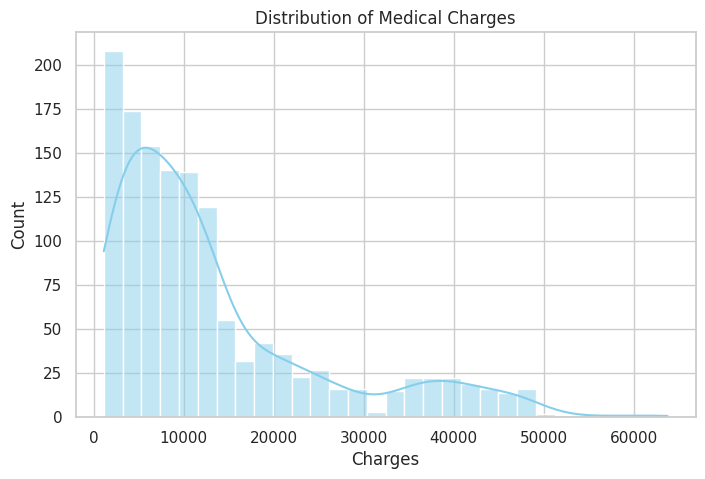

In [16]:
#Histogram of Charges
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='charges', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-17-254848922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='pastel')


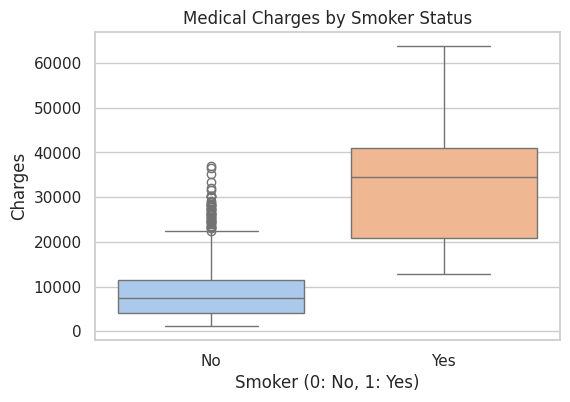

In [17]:
#Boxplot of Charges by Smoker Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='smoker', y='charges', palette='pastel')
plt.title('Medical Charges by Smoker Status')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Charges')
plt.xticks([0, 1], ['No', 'Yes']) # Set custom labels for clarity
plt.show()

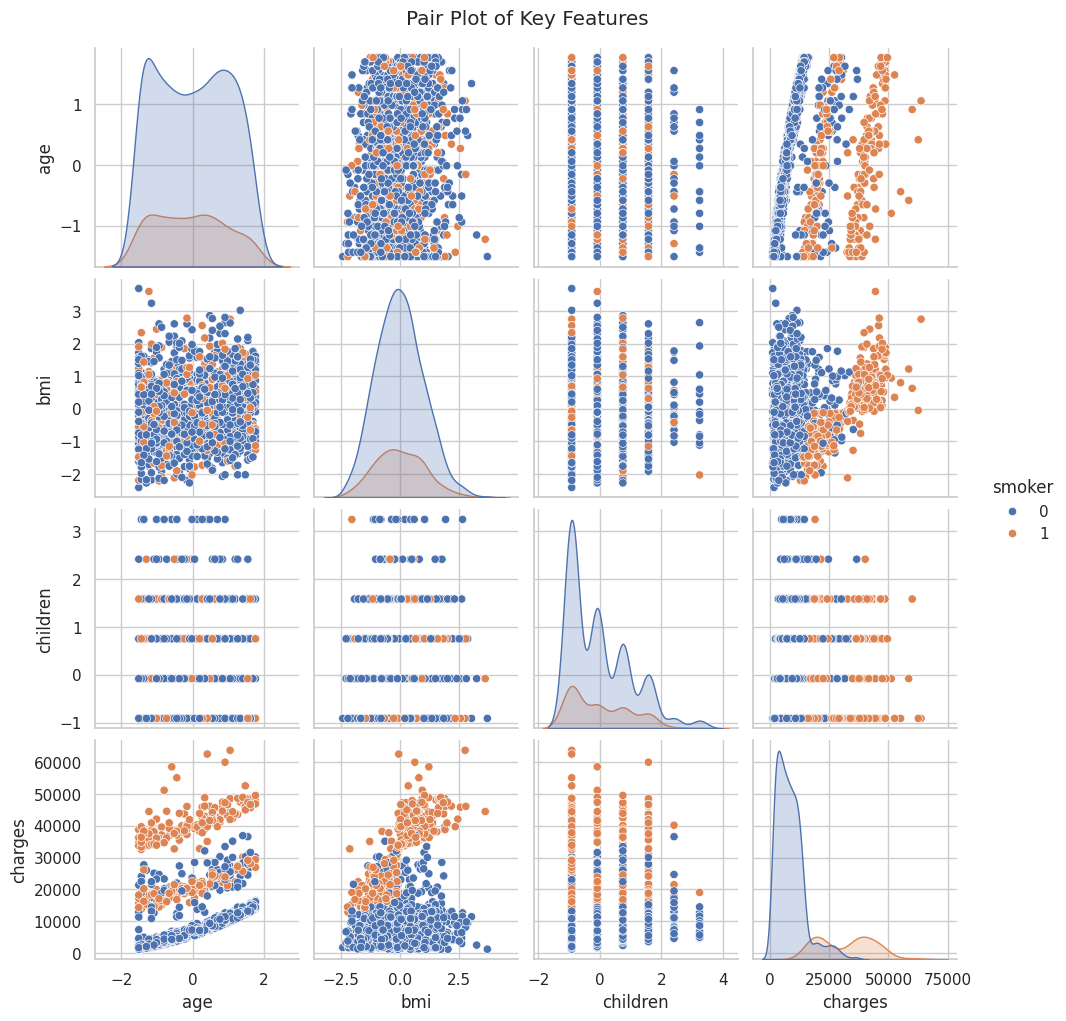

In [18]:
# Pair Plot to Observe Relationships
sns.pairplot(df, vars=['age', 'bmi', 'children', 'charges'], hue='smoker')
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


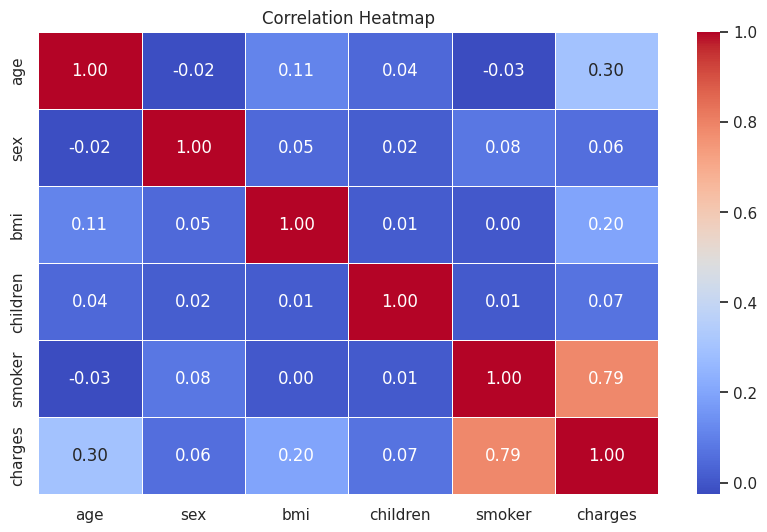

In [19]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split

# Select features (X) and target (y)
features = ['age', 'sex', 'bmi', 'children', 'smoker']
target = 'charges'
X = df[features]
y = df[target]
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (1070, 5) (1070,)
Testing set shape (X_test, y_test): (268, 5) (268,)


In [22]:
X_train.head()

,age,sex,bmi,children,smoker
560,0.483668,0,-1.757474,0.751079,0
1285,0.554869,0,-1.040599,-0.908614,0
1142,0.910875,0,-0.952015,-0.908614,0
969,-0.014740,0,0.599846,3.240619,0
486,1.053277,0,-1.508126,1.580926,0


In [23]:
X_test.head()

,age,sex,bmi,children,smoker
764,0.412467,0,-0.900341,0.751079,0
887,-0.228344,0,-0.105546,-0.908614,0
890,1.765289,0,-0.619825,-0.908614,1
1293,0.483668,1,-0.806836,1.580926,0
259,-1.438764,1,0.206139,-0.908614,1


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Output regression coefficients and intercept
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Regression Coefficients: [ 3.61045878e+03 -7.95178837e+00  1.99661405e+03  5.14859607e+02
  2.36539033e+04]
Intercept: 8476.556672203726


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 4213.4847978071375
Mean Squared Error (MSE): 33979257.05080821
R-squared (R²): 0.7811302113434095


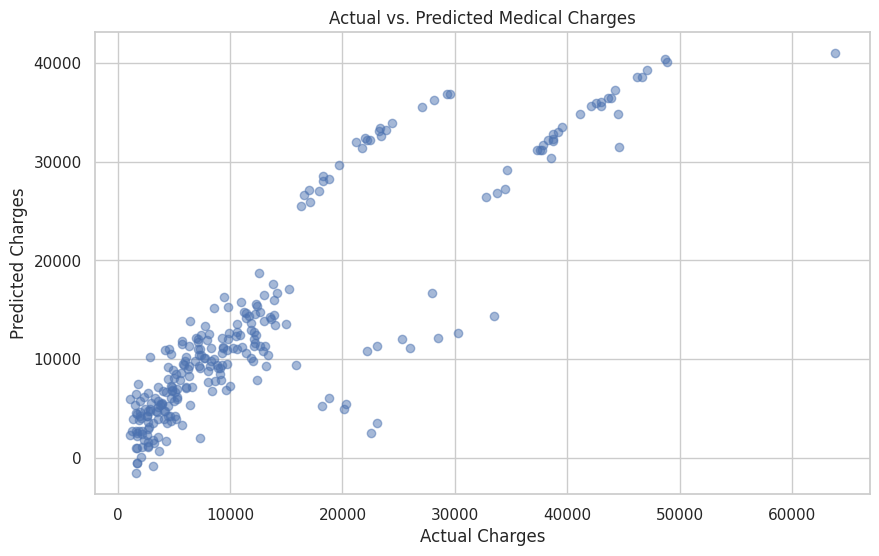

In [30]:
# Visualize actual vs. predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Medical Charges")
plt.show()

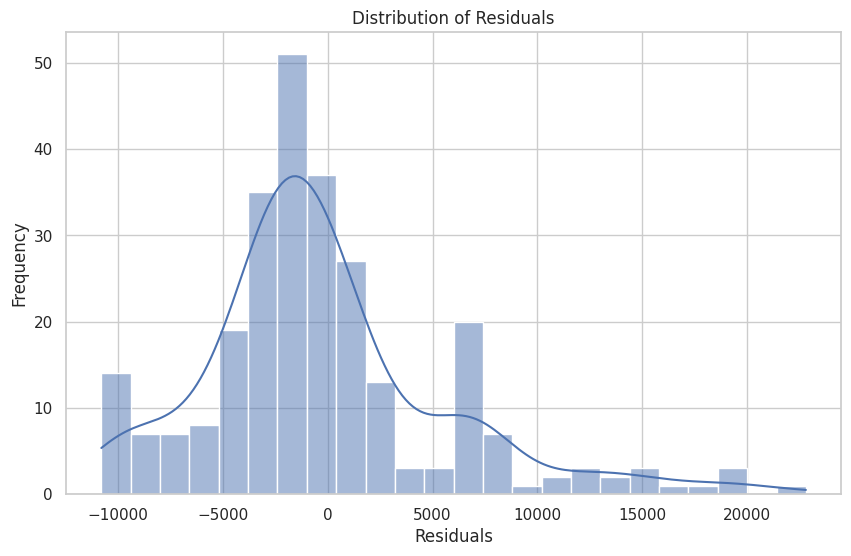

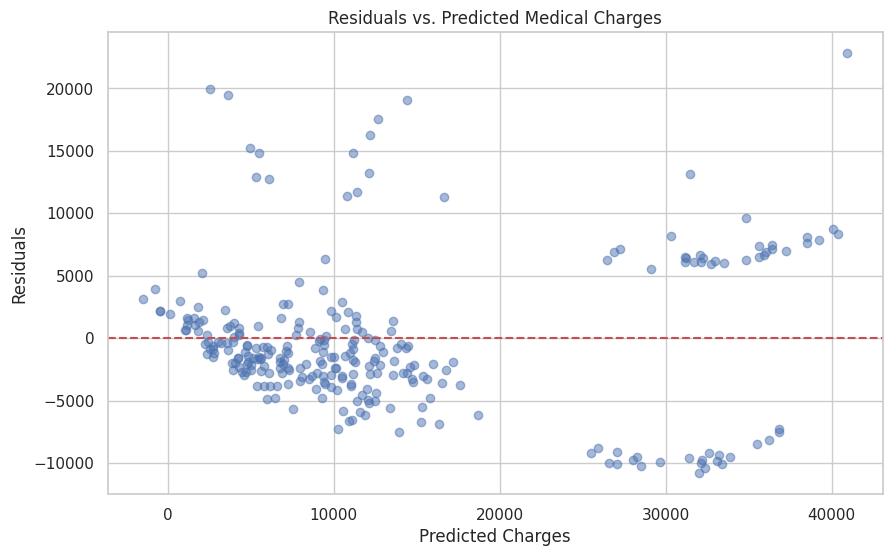

In [31]:
# Visualize residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Medical Charges")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# **Summary:**
Based on the scatter plots and residual plots, here's an interpretation of the model results:

The scatter plot of Actual vs. Predicted Medical Charges shows a general upward trend, indicating that the model is capturing the relationship between the features and charges. However, there is significant scatter around the ideal line (where actual equals predicted), particularly for higher charges. This suggests that the model's predictions are less accurate for individuals with very high medical expenses.

The distribution of residuals plot shows that the residuals are somewhat centered around zero, which is a good sign. However, there is a noticeable skew to the right, meaning the model tends to underestimate higher charges. The residuals vs. predicted charges plot also highlights this, with a fanning-out shape (heteroscedasticity) where the variability of the residuals increases as the predicted charges increase. This pattern suggests that the model's performance is not consistent across the range of charges, and it struggles to accurately predict higher medical costs. The Mean Absolute Error (MAE) of 4213.48 indicates that, on average, the model's predictions are off by approximately $4213.48. The R-squared value of 0.78 suggests that the model explains about 78% of the variance in medical charges.